In [1]:
import pandas as pd 
import numpy
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#cancer data

In [3]:
cancer= pd.read_csv('colonandrectum_cancer_deaths_per_100000_men.csv')
cancer.columns

Index(['country', '1955', '1956', '1957', '1958', '1959', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object')

In [4]:
new_cancer = pd.melt(cancer , id_vars=["country"])
new_cancer.rename(columns = {'variable':'year' , 'value':'cancer_value'} , inplace=True)
new_cancer.sort_values(['country' , 'year' , 'cancer_value'],inplace=True)
new_cancer.set_index('country',inplace=True)
new_cancer.reset_index(inplace=True)
new_cancer.head(5)

,country,year,cancer_value
0,Afghanistan,1955,NaN
1,Afghanistan,1956,NaN
2,Afghanistan,1957,NaN
3,Afghanistan,1958,NaN
4,Afghanistan,1959,NaN


In [5]:
print(new_cancer.index)
new_cancer.head(5)

RangeIndex(start=0, stop=11594, step=1)


,country,year,cancer_value
0,Afghanistan,1955,NaN
1,Afghanistan,1956,NaN
2,Afghanistan,1957,NaN
3,Afghanistan,1958,NaN
4,Afghanistan,1959,NaN


In [6]:
# Remove missing values: 
# dropna():dropped DataFrame
print('cancer original length: '+ str(len(new_cancer)))
cancer_NoMissing= new_cancer.dropna() 

# default drop method: if all values are NA, drop that label
print('cancer new length: '+ str(len(cancer_NoMissing)))

cancer original length: 11594
cancer new length: 6204


In [7]:
cancer_NoMissing.set_index('country',inplace=True)
cancer_NoMissing.reset_index(inplace=True)
cancer_NoMissing.head(10)

,country,year,cancer_value
0,Afghanistan,1990,8.27
1,Afghanistan,1991,8.35
2,Afghanistan,1992,8.44
3,Afghanistan,1993,8.55
4,Afghanistan,1994,8.66
5,Afghanistan,1995,8.74
6,Afghanistan,1996,8.82
7,Afghanistan,1997,8.88
8,Afghanistan,1998,8.94
9,Afghanistan,1999,9.06


In [8]:
# be careful about the indexes:
cancer_NoMissing.index # note that the index does not start from zero!
cancer_NoMissing.index= range(len(cancer_NoMissing))
cancer_NoMissing.index

RangeIndex(start=0, stop=6204, step=1)

In [9]:
#industry_workers data

In [10]:
workers= pd.read_csv('industry_workers_percent_of_employment.csv')
print(workers.columns)

Index(['country', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')


In [11]:


new_workers = pd.melt(workers , id_vars=["country"])
new_workers.rename(columns = {'variable':'year' , 'value':'workers_value'} , inplace=True)
new_workers.sort_values(['country' , 'year' , 'workers_value'],inplace=True)
new_workers.set_index('country',inplace=True)
new_workers.reset_index(inplace=True)
new_workers.head(10)


,country,year,workers_value
0,Afghanistan,1970,NaN
1,Afghanistan,1971,NaN
2,Afghanistan,1972,NaN
3,Afghanistan,1973,NaN
4,Afghanistan,1974,NaN
5,Afghanistan,1975,NaN
6,Afghanistan,1976,NaN
7,Afghanistan,1977,NaN
8,Afghanistan,1978,NaN
9,Afghanistan,1979,NaN


In [12]:
print('workers rate original length: '+ str(len(new_workers)))
workers_NoMissing= new_workers.dropna()
print('workers rate new length: '+ str(len(workers_NoMissing)))

workers rate original length: 8448
workers rate new length: 3534


In [13]:
workers_NoMissing.set_index('country',inplace=True)
workers_NoMissing.reset_index(inplace=True)
workers_NoMissing.sort_values(['country' , 'year' , 'workers_value'],inplace=True)
workers_NoMissing.head(10)

,country,year,workers_value
0,Afghanistan,2008,12.40
1,Afghanistan,2012,16.60
2,Albania,1994,11.00
3,Albania,1995,10.20
4,Albania,1996,9.59
5,Albania,1997,9.30
6,Albania,1998,8.76
7,Albania,1999,8.73
8,Albania,2000,6.65
9,Albania,2001,6.49


In [14]:
workers_NoMissing.index= range(len(workers_NoMissing))
workers_NoMissing.index

RangeIndex(start=0, stop=3534, step=1)

In [15]:
cancer_NoMissing.head(5)

,country,year,cancer_value
0,Afghanistan,1990,8.27
1,Afghanistan,1991,8.35
2,Afghanistan,1992,8.44
3,Afghanistan,1993,8.55
4,Afghanistan,1994,8.66


In [16]:
workers_NoMissing.head(5)

,country,year,workers_value
0,Afghanistan,2008,12.40
1,Afghanistan,2012,16.60
2,Albania,1994,11.00
3,Albania,1995,10.20
4,Albania,1996,9.59


In [17]:
#Merge two data frames:
#Inner joins yield a DataFrame that contains only rows where the value being joined (acc to column names) exists in BOTH tables. 
#Now, data contains no empty rows

In [18]:
data = pd.merge(left= cancer_NoMissing, right= workers_NoMissing)
data.head(5)

,country,year,cancer_value,workers_value
0,Afghanistan,2008,10.10,12.40
1,Afghanistan,2012,10.50,16.60
2,Albania,1994,7.72,11.00
3,Albania,1995,7.48,10.20
4,Albania,1996,7.28,9.59


In [19]:
data.index= range(len(data))

print('Data length: '+ str(len(data)))

Data length: 3003


In [20]:
data.index


RangeIndex(start=0, stop=3003, step=1)

In [21]:
#Converts to numeric :lets python recognize these columns as numeric so that some numeric operations can be done

In [22]:
data['year']= pd.to_numeric(data['year'])
data['cancer_value']= pd.to_numeric(data['cancer_value'])
data['workers_value']= pd.to_numeric(data['workers_value'])
print(data.head(3)) 
print(data["cancer_value"][:5])
data.head(10)

       country  year  cancer_value  workers_value
0  Afghanistan  2008         10.10           12.4
1  Afghanistan  2012         10.50           16.6
2      Albania  1994          7.72           11.0
0    10.10
1    10.50
2     7.72
3     7.48
4     7.28
Name: cancer_value, dtype: float64


,country,year,cancer_value,workers_value
0,Afghanistan,2008,10.10,12.40
1,Afghanistan,2012,10.50,16.60
2,Albania,1994,7.72,11.00
3,Albania,1995,7.48,10.20
4,Albania,1996,7.28,9.59
5,Albania,1997,7.11,9.30
6,Albania,1998,7.09,8.76
7,Albania,1999,7.20,8.73
8,Albania,2000,7.39,6.65
9,Albania,2001,7.71,6.49


In [23]:
countCountry= data['country'].value_counts(sort= True, ascending=False, dropna=False) # sort= True
print(countCountry.head(5))
print()
perCountry= data['country'].value_counts(sort= True, ascending=False, dropna=False, normalize=True)
print(perCountry.head(5))
print()
print ('Number of Different Countries: '+ str(len(countCountry)))
print ('Number of observations for the Country column:'+ str(len(data['country'])))


Finland           47
Australia         47
France            47
Netherlands       47
United Kingdom    47
Name: country, dtype: int64

Finland           0.015651
Australia         0.015651
France            0.015651
Netherlands       0.015651
United Kingdom    0.015651
Name: country, dtype: float64

Number of Different Countries: 170
Number of observations for the Country column:3003


In [24]:
print ('Year ranges from '+ str(data['year'].min())+' and to '+ str(data['year'].max()) )
countYear= data['year'].value_counts(sort= False, dropna=False)
print(countYear.head(5))
perYear= data['year'].value_counts(sort= False, dropna=False, normalize=True)
print(perYear.head(5))
print ('Number of Different Years: '+ str(len(countYear)))

Year ranges from 1970 and to 2016
1970    11
1972    13
1974    14
1976    14
1978    16
Name: year, dtype: int64
1970    0.003663
1972    0.004329
1974    0.004662
1976    0.004662
1978    0.005328
Name: year, dtype: float64
Number of Different Years: 47


In [25]:
countCancer= data['cancer_value'].value_counts(sort= False, dropna=False) 
# dropna=False  required, otherwise python does not show mising values

print(countCancer.head(5))
perCancer= data['cancer_value'].value_counts(sort= False, dropna=False, normalize=True)
print(perCancer.head(5))
print ('Number of Different Cancer values: '+ str(len(countCancer)))

10.5    10
8.0      3
24.0     9
25.0    10
26.0    13
Name: cancer_value, dtype: int64
10.5    0.003330
8.0     0.000999
24.0    0.002997
25.0    0.003330
26.0    0.004329
Name: cancer_value, dtype: float64
Number of Different Cancer values: 734


In [26]:
countWorkers= data['workers_value'].value_counts(sort= False, dropna=False)
print(countWorkers.head(5))
perWorkers= data['workers_value'].value_counts(sort= False, dropna=False, normalize=True)
print(perWorkers.head(5))
print ('Number of Different workers values: '+ str(len(countWorkers)))

11.0     3
13.5     4
24.0     8
26.0    15
27.0    10
Name: workers_value, dtype: int64
11.0    0.000999
13.5    0.001332
24.0    0.002664
26.0    0.004995
27.0    0.003330
Name: workers_value, dtype: float64
Number of Different workers values: 454


In [27]:
data= data.dropna(subset =['cancer_value','workers_value'], how='any')

data= data.reset_index(drop=True) # not to save old index as a column
print('Lenghth of the new dataframe: '+str(len(data)))

Lenghth of the new dataframe: 3003


In [28]:
# PART I: Desribe Data

In [29]:
# Now, Create cancer_value groups, describe and visualize data:

In [30]:
print ('Cancer ranges from '+ str(data['cancer_value'].min())+' and to '+ str(data['cancer_value'].max()) )
data['cancer_value'].describe()

Cancer ranges from 2.22 and to 49.0


count    3003.000000
mean       18.414772
std         9.361073
min         2.220000
25%        10.300000
50%        17.100000
75%        25.500000
max        49.000000
Name: cancer_value, dtype: float64

In [31]:
# Cancer column keeps continuous quantitative variables.
# In order to create Cancer groups, we need to generate partitions. 
# Below, we call the "cut " method. Note that the first cut is (2, 50)
data['CancerGroup']= pd.cut(data.cancer_value, [2.20,5.0,10.0,20.0,30.0,40.0,50.0]) 
# no need to sort the data frame.

print(len(data))
print(len(data['CancerGroup']))


3003
3003


In [32]:
data['CancerGroup']= data['CancerGroup'].astype('category')
data['CancerGroup'].describe()


count             3003
unique               6
top       (10.0, 20.0]
freq               999
Name: CancerGroup, dtype: object

In [33]:
CancerGroupP= data['CancerGroup'].value_counts(sort= False, normalize= True) 
# value_counts() should make more sense now
print(CancerGroupP)

(2.2, 5.0]      0.015651
(5.0, 10.0]     0.222444
(10.0, 20.0]    0.332667
(20.0, 30.0]    0.329004
(30.0, 40.0]    0.076257
(40.0, 50.0]    0.023976
Name: CancerGroup, dtype: float64


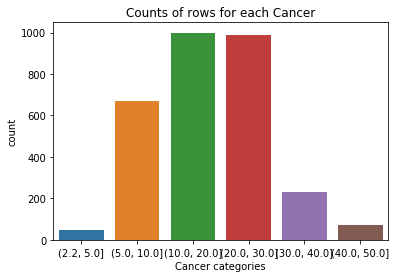

In [34]:
seaborn.countplot(x= 'CancerGroup', data= data)
plt.xlabel('Cancer categories')
plt.title('Counts of rows for each Cancer')
plt.show()

Text(0.5, 1.0, 'Counts of rows for each Cancer')

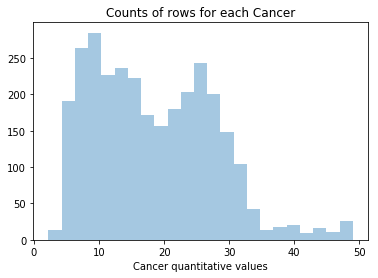

In [35]:
seaborn.distplot(data['cancer_value'].dropna(), kde= False)
plt.xlabel('Cancer quantitative values')
plt.title('Counts of rows for each Cancer')

In [36]:
print ('Workers ranges from '+ str(data['workers_value'].min())+' and to '+ 
       str(data['workers_value'].max()) )
data['workers_value'].describe()

Workers ranges from 2.05 and to 59.6


count    3003.000000
mean       24.746104
std         8.020081
min         2.050000
25%        19.500000
50%        24.100000
75%        30.200000
max        59.600000
Name: workers_value, dtype: float64

In [37]:
data['WorkersGroup']= pd.cut(data["workers_value"], [0,15,25,35,45,59]) 

In [38]:
data['WorkersGroup']= data['WorkersGroup'].astype('category')
data['WorkersGroup'].describe()

count         3002
unique           5
top       (15, 25]
freq          1313
Name: WorkersGroup, dtype: object

In [39]:
WG= data['WorkersGroup'].value_counts(sort= False, normalize= True)
print(WG)

(0, 15]     0.100600
(15, 25]    0.437375
(25, 35]    0.356429
(35, 45]    0.100266
(45, 59]    0.005330
Name: WorkersGroup, dtype: float64


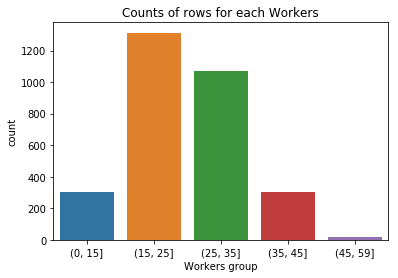

In [40]:
seaborn.countplot(x= 'WorkersGroup', data= data)
plt.xlabel('Workers group')
plt.title('Counts of rows for each Workers')
plt.show()

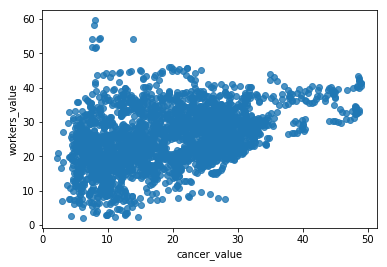

In [41]:
seaborn.regplot(x= "cancer_value", y= "workers_value", fit_reg= False, data= data)

In [42]:
data2 = data[data['year']>=2000]


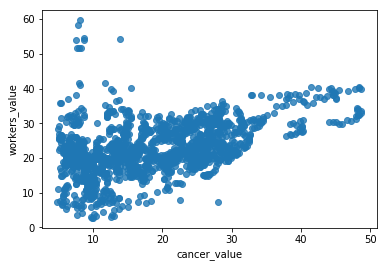

In [43]:
seaborn.regplot(x= "cancer_value", y= "workers_value", fit_reg= False, data= data2)

In [44]:
WG= data2['WorkersGroup'].value_counts(sort= False)
print(WG)

(0, 15]     197
(15, 25]    949
(25, 35]    478
(35, 45]     59
(45, 59]      8
Name: WorkersGroup, dtype: int64


In [45]:
def WORKER (row):
    if row['workers_value'] < 15 :
        return 0
    else:
        return 1

In [46]:
data2['Worker']= data2.apply(lambda row : WORKER(row), axis= 1)
# axis=1, tells python to apply this function to each row 
# Arbitrary functions can be applied along the axes of a DataFrame using the apply() method
data2['Worker'].value_counts()

1    1499
0     193
Name: Worker, dtype: int64

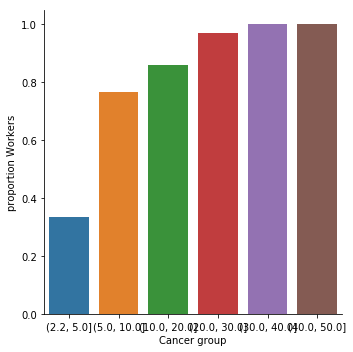

In [47]:
seaborn.factorplot(x= 'CancerGroup', y= 'Worker', data= data2, kind= "bar", ci=None)
plt.xlabel('Cancer group')
plt.ylabel('proportion Workers')
plt.show()

In [48]:
def WorkerRangeGroup (row):
   if row['cancer_value'] > 2.20 and row['cancer_value']<= 5.0 :
      return 1
   if row['cancer_value'] > 5.0 and row['cancer_value']<= 10.0 :
      return 2
   if row['cancer_value'] > 10.0 and row['cancer_value']<= 20.0 :
      return 3
   if row['cancer_value'] > 20.0 and row['cancer_value']<= 30.0 :
      return 4
   if row['cancer_value'] > 30.0 and row['cancer_value']<=40.0:
      return 5
   if row['cancer_value'] > 40.0 and row['cancer_value']<=50.0  :
      return 6
   

In [49]:
data2['CancerCat'] = data2.apply (lambda row: WorkerRangeGroup (row),axis=1)

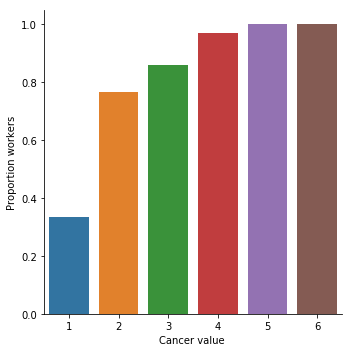

In [50]:
seaborn.factorplot(x= 'CancerCat', y= 'Worker', data= data2, kind= "bar", ci=None)
plt.xlabel('Cancer value ')
plt.ylabel('Proportion workers')
plt.show()

In [51]:
#chi square testi

In [52]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

In [53]:
data3= data2[['CancerCat', 'workers_value']]
print(data3.head(10))

    CancerCat  workers_value
0           3          12.40
1           3          16.60
8           2           6.65
9           2           6.49
10          2          13.70
11          2          13.40
12          2          13.60
13          2          13.50
14          2          13.50
15          2          22.60


In [54]:
data4= data2[['Worker', 'CancerCat']]
print(data4.head(10))

    Worker  CancerCat
0        0          3
1        1          3
8        0          2
9        0          2
10       0          2
11       0          2
12       0          2
13       0          2
14       0          2
15       1          2


In [55]:
# contingency table of observed counts
ct1=pd.crosstab(data4['Worker'], data4['CancerCat'])
print (ct1) # ct1 is a two-dimentional array

CancerCat  1    2    3    4    5   6
Worker                              
0          2   94   81   16    0   0
1          1  309  498  534  108  49


In [56]:
# column percentages
colsum=ct1.sum(axis=0) # axis=0 to sum all columns
colpct=ct1/colsum
print(colpct)

CancerCat         1         2         3         4    5    6
Worker                                                     
0          0.666667  0.233251  0.139896  0.029091  0.0  0.0
1          0.333333  0.766749  0.860104  0.970909  1.0  1.0


In [57]:
import scipy.stats

In [58]:
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

chi-square value, p value, expected counts
(129.05016517958376, 3.785520430466749e-26, 5, array([[3.42198582e-01, 4.59686761e+01, 6.60443262e+01, 6.27364066e+01,
        1.23191489e+01, 5.58924350e+00],
       [2.65780142e+00, 3.57031324e+02, 5.12955674e+02, 4.87263593e+02,
        9.56808511e+01, 4.34107565e+01]]))


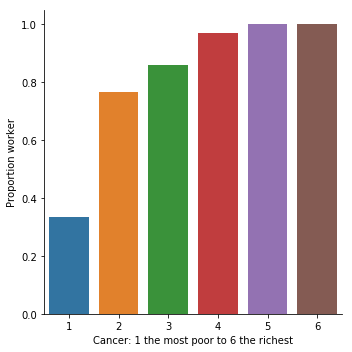

In [59]:
seaborn.factorplot(x= 'CancerCat', y= 'Worker', data= data4, kind= "bar", ci=None)
plt.xlabel('Cancer: 1 the most poor to 6 the richest')
plt.ylabel('Proportion worker')
plt.show()

In [60]:
# We need to run chi-square tests for each of the comparisons
recode_1v2 = {1: 1, 2: 2} # this is required because we are going to use only these two columns
data4['Cancer_1v2']= data4['CancerCat'].map(recode_1v2)

# contingency table of observed counts
table_1v2=pd.crosstab(data4['Worker'], data4['Cancer_1v2'])
print (table_1v2)

# column percentages
colsum=table_1v2.sum(axis=0)
colpct=table_1v2/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v2= scipy.stats.chi2_contingency(table_1v2)
print (cs_1v2)

Cancer_1v2  1.0  2.0
Worker              
0             2   94
1             1  309
Cancer_1v2       1.0       2.0
Worker                        
0           0.666667  0.233251
1           0.333333  0.766749
chi-square value, p value, expected counts
(1.1627246257904427, 0.2809011929281648, 1, array([[  0.70935961,  95.29064039],
       [  2.29064039, 307.70935961]]))


In [61]:
recode_1v3 = {1: 1, 3: 3}
data4['Cancer_1v3']= data4['CancerCat'].map(recode_1v3)

# contingency table of observed counts
table_1v3=pd.crosstab(data4['Worker'], data4['Cancer_1v3'])
print (table_1v3)

# column percentages
colsum=table_1v3.sum(axis=0)
colpct=table_1v3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v3= scipy.stats.chi2_contingency(table_1v3)
print (cs_1v3)

Cancer_1v3  1.0  3.0
Worker              
0             2   81
1             1  498
Cancer_1v3       1.0       3.0
Worker                        
0           0.666667  0.139896
1           0.333333  0.860104
chi-square value, p value, expected counts
(3.150022874890176, 0.07592589860250833, 1, array([[4.27835052e-01, 8.25721649e+01],
       [2.57216495e+00, 4.96427835e+02]]))


In [62]:
recode_1v4 = {1: 1, 4: 4}
data4['Cancer_1v4']= data4['CancerCat'].map(recode_1v4)

# contingency table of observed counts
table_1v4=pd.crosstab(data4['Worker'], data4['Cancer_1v4'])
print (table_1v4)

# column percentages
colsum=table_1v4.sum(axis=0)
colpct=table_1v4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v4= scipy.stats.chi2_contingency(table_1v4)
print (cs_1v4)

Cancer_1v4  1.0  4.0
Worker              
0             2   16
1             1  534
Cancer_1v4       1.0       4.0
Worker                        
0           0.666667  0.029091
1           0.333333  0.970909
chi-square value, p value, expected counts
(20.930447040498443, 4.762642283749946e-06, 1, array([[9.76491863e-02, 1.79023508e+01],
       [2.90235081e+00, 5.32097649e+02]]))


In [63]:
recode_1v5 = {1: 1, 5: 5}
data4['Cancer_1v5']= data4['CancerCat'].map(recode_1v5)

# contingency table of observed counts
table_1v5=pd.crosstab(data4['Worker'], data4['Cancer_1v5'])
print (table_1v5)

# column percentages
colsum=table_1v5.sum(axis=0)
colpct=table_1v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v5= scipy.stats.chi2_contingency(table_1v5)
print (cs_1v5)

Cancer_1v5  1.0  5.0
Worker              
0             2    0
1             1  108
Cancer_1v5       1.0  5.0
Worker                   
0           0.666667  0.0
1           0.333333  1.0
chi-square value, p value, expected counts
(40.48289373088684, 1.9834498104365506e-10, 1, array([[5.40540541e-02, 1.94594595e+00],
       [2.94594595e+00, 1.06054054e+02]]))


In [64]:
recode_1v6 = {1: 1, 6: 6}
data4['Cancer_1v6']= data4['CancerCat'].map(recode_1v6)

# contingency table of observed counts
table_1v6=pd.crosstab(data4['Worker'], data4['Cancer_1v6'])
print (table_1v6)

# column percentages
colsum=table_1v6.sum(axis=0)
colpct=table_1v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v6= scipy.stats.chi2_contingency(table_1v6)
print (cs_1v6)

Cancer_1v6  1.0  6.0
Worker              
0             2    0
1             1   49
Cancer_1v6       1.0  6.0
Worker                   
0           0.666667  0.0
1           0.333333  1.0
chi-square value, p value, expected counts
(18.33795918367347, 1.8498438592378434e-05, 1, array([[ 0.11538462,  1.88461538],
       [ 2.88461538, 47.11538462]]))


In [65]:
recode_2v3 = {2: 2, 3: 3}
data4['Cancer_2v3']= data4['CancerCat'].map(recode_2v3)

# contingency table of observed counts
table_2v3=pd.crosstab(data4['Worker'], data4['Cancer_2v3'])
print (table_2v3)

# column percentages
colsum=table_2v3.sum(axis=0)
colpct=table_2v3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v3= scipy.stats.chi2_contingency(table_2v3)
print (cs_2v3)

Cancer_2v3  2.0  3.0
Worker              
0            94   81
1           309  498
Cancer_2v3       2.0       3.0
Worker                        
0           0.233251  0.139896
1           0.766749  0.860104
chi-square value, p value, expected counts
(13.509809013918447, 0.00023731969166282884, 1, array([[ 71.81771894, 103.18228106],
       [331.18228106, 475.81771894]]))


In [66]:
recode_2v4 = {2: 2, 4: 4}
data4['Cancer_2v4']= data4['CancerCat'].map(recode_2v4)

# contingency table of observed counts
table_2v4=pd.crosstab(data4['Worker'], data4['Cancer_2v4'])
print (table_2v4)

# column percentages
colsum=table_2v4.sum(axis=0)
colpct=table_2v4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v4= scipy.stats.chi2_contingency(table_2v4)
print (cs_2v4)

Cancer_2v4  2.0  4.0
Worker              
0            94   16
1           309  534
Cancer_2v4       2.0       4.0
Worker                        
0           0.233251  0.029091
1           0.766749  0.970909
chi-square value, p value, expected counts
(92.95779075822199, 5.342159734542642e-22, 1, array([[ 46.51626443,  63.48373557],
       [356.48373557, 486.51626443]]))


In [67]:
recode_2v5 = {2: 2, 5: 5}
data4['Cancer_2v5']= data4['CancerCat'].map(recode_2v5)

# contingency table of observed counts
table_2v5=pd.crosstab(data4['Worker'], data4['Cancer_2v5'])
print (table_2v5)

# column percentages
colsum=table_2v5.sum(axis=0)
colpct=table_2v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v5= scipy.stats.chi2_contingency(table_2v5)
print (cs_2v5)

Cancer_2v5  2.0  5.0
Worker              
0            94    0
1           309  108
Cancer_2v5       2.0  5.0
Worker                   
0           0.233251  0.0
1           0.766749  1.0
chi-square value, p value, expected counts
(29.335361738209762, 6.087462538345797e-08, 1, array([[ 74.13307241,  19.86692759],
       [328.86692759,  88.13307241]]))


In [68]:
recode_2v6 = {2: 2, 6: 6}
data4['Cancer_2v6']= data4['CancerCat'].map(recode_2v6)

# contingency table of observed counts
table_2v6=pd.crosstab(data4['Worker'], data4['Cancer_2v6'])
print (table_2v6)

# column percentages
colsum=table_2v6.sum(axis=0)
colpct=table_2v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v6= scipy.stats.chi2_contingency(table_2v6)
print (cs_2v6)

Cancer_2v6  2.0  6.0
Worker              
0            94    0
1           309   49
Cancer_2v6       2.0  6.0
Worker                   
0           0.233251  0.0
1           0.766749  1.0
chi-square value, p value, expected counts
(13.048922428689643, 0.00030345895169809164, 1, array([[ 83.80973451,  10.19026549],
       [319.19026549,  38.80973451]]))


In [69]:
recode_3v4 = {3: 3, 4: 4}
data4['Cancer_3v4']= data4['CancerCat'].map(recode_3v4)

# contingency table of observed counts
table_3v4=pd.crosstab(data4['Worker'], data4['Cancer_3v4'])
print (table_3v4)

# column percentages
colsum=table_3v4.sum(axis=0)
colpct=table_3v4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_3v4= scipy.stats.chi2_contingency(table_3v4)
print (cs_3v4)

Cancer_3v4  3.0  4.0
Worker              
0            81   16
1           498  534
Cancer_3v4       3.0       4.0
Worker                        
0           0.139896  0.029091
1           0.860104  0.970909
chi-square value, p value, expected counts
(42.697083893803985, 6.390748928270934e-11, 1, array([[ 49.74579274,  47.25420726],
       [529.25420726, 502.74579274]]))


In [70]:
recode_3v5 = {3: 3, 5: 5}
data4['Cancer_3v5']= data4['CancerCat'].map(recode_3v5)

# contingency table of observed counts
table_3v5=pd.crosstab(data4['Worker'], data4['Cancer_3v5'])
print (table_3v5)

# column percentages
colsum=table_3v5.sum(axis=0)
colpct=table_3v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_3v5= scipy.stats.chi2_contingency(table_3v5)
print (cs_3v5)

Cancer_3v5  3.0  5.0
Worker              
0            81    0
1           498  108
Cancer_3v5       3.0  5.0
Worker                   
0           0.139896  0.0
1           0.860104  1.0
chi-square value, p value, expected counts
(15.80958747361175, 7.00466697615442e-05, 1, array([[ 68.26637555,  12.73362445],
       [510.73362445,  95.26637555]]))


In [71]:
recode_3v6 = {3: 3, 6: 6}
data4['Cancer_3v6']= data4['CancerCat'].map(recode_3v6)

# contingency table of observed counts
table_3v6=pd.crosstab(data4['Worker'], data4['Cancer_3v6'])
print (table_3v6)

# column percentages
colsum=table_3v6.sum(axis=0)
colpct=table_3v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_3v6= scipy.stats.chi2_contingency(table_3v6)
print (cs_3v6)

Cancer_3v6  3.0  6.0
Worker              
0            81    0
1           498   49
Cancer_3v6       3.0  6.0
Worker                   
0           0.139896  0.0
1           0.860104  1.0
chi-square value, p value, expected counts
(6.67401867206768, 0.009782835951614444, 1, array([[ 74.67993631,   6.32006369],
       [504.32006369,  42.67993631]]))


In [72]:
recode_4v5 = {4: 4, 5: 5}
data4['Cancer_4v5']= data4['CancerCat'].map(recode_4v5)

# contingency table of observed counts
table_4v5=pd.crosstab(data4['Worker'], data4['Cancer_4v5'])
print (table_4v5)

# column percentages
colsum=table_4v5.sum(axis=0)
colpct=table_4v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_4v5= scipy.stats.chi2_contingency(table_4v5)
print (cs_4v5)

Cancer_4v5  4.0  5.0
Worker              
0            16    0
1           534  108
Cancer_4v5       4.0  5.0
Worker                   
0           0.029091  0.0
1           0.970909  1.0
chi-square value, p value, expected counts
(2.110667713610666, 0.14627548072716345, 1, array([[ 13.37386018,   2.62613982],
       [536.62613982, 105.37386018]]))


In [73]:
recode_4v6 = {4: 4, 6: 6}
data4['Cancer_4v6']= data4['CancerCat'].map(recode_4v6)

# contingency table of observed counts
table_4v6=pd.crosstab(data4['Worker'], data4['Cancer_4v6'])
print (table_4v6)

# column percentages
colsum=table_4v6.sum(axis=0)
colpct=table_4v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_4v6= scipy.stats.chi2_contingency(table_4v6)
print (cs_4v6)

Cancer_4v6  4.0  6.0
Worker              
0            16    0
1           534   49
Cancer_4v6       4.0  6.0
Worker                   
0           0.029091  0.0
1           0.970909  1.0
chi-square value, p value, expected counts
(0.5593286665399048, 0.45453085952428596, 1, array([[ 14.69115192,   1.30884808],
       [535.30884808,  47.69115192]]))


In [74]:
recode_5v6 = {5: 5, 6: 6}
data4['Cancer_5v6']= data4['CancerCat'].map(recode_5v6)

# contingency table of observed counts
table_5v6=pd.crosstab(data4['Worker'], data4['Cancer_5v6'])
print (table_5v6)

# column percentages
colsum=table_5v6.sum(axis=0)
colpct=table_5v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_5v6= scipy.stats.chi2_contingency(table_5v6)
print (cs_5v6)

Cancer_5v6  5.0  6.0
Worker              
1           108   49
Cancer_5v6  5.0  6.0
Worker              
1             1    1
chi-square value, p value, expected counts
(0.0, 1.0, 0, array([[108.,  49.]]))
